In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [6]:
#
california=fetch_california_housing()
df=pd.DataFrame(california.data,columns=california.feature_names)
df['Price']=california.target
print("Datset (first 5 rows):\n",df.head())

Datset (first 5 rows):
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude  Price
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88    -122.23  4.526
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86    -122.22  3.585
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85    -122.24  3.521
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85    -122.25  3.413
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85    -122.25  3.422


In [7]:
print("Datainfo:\n",df.info())
print("\nSummary Statistics\n",df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
Datainfo:
 None

Summary Statistics
              MedInc      HouseAge      AveRooms     AveBedrms  ...      AveOccup      Latitude     Longitude         Price
count  20640.000000  20640.000000  20640.000000  20640.000000  ...  20640.000000  20640.000000  20640.000000  20640.000000
mean       3.870671     28.639486      5.429000      1.096675  ...      3.070655     35.631861   -119.569704      2.06

In [8]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

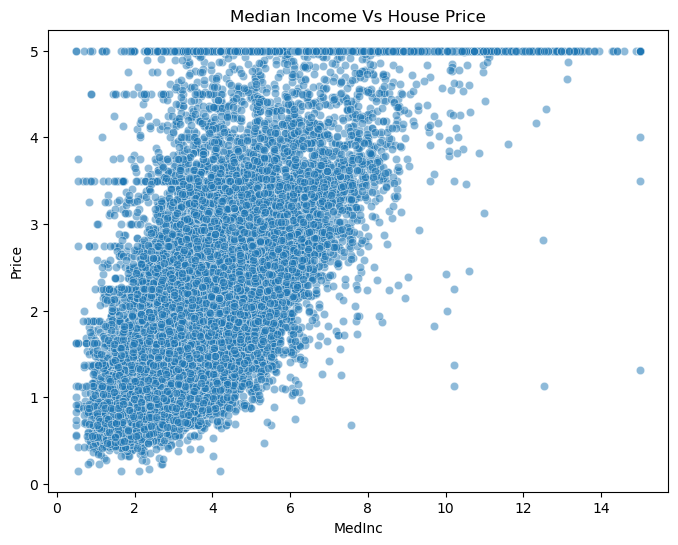

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='MedInc',y='Price',data=df,alpha=0.5)
plt.title('Median Income Vs House Price')
plt.show()

In [11]:
print("\nCorrelation with Price:\n",df.corr()['Price'].sort_values())


Correlation with Price:
 Latitude     -0.144160
AveBedrms    -0.046701
Longitude    -0.045967
Population   -0.024650
AveOccup     -0.023737
HouseAge      0.105623
AveRooms      0.151948
MedInc        0.688075
Price         1.000000
Name: Price, dtype: float64


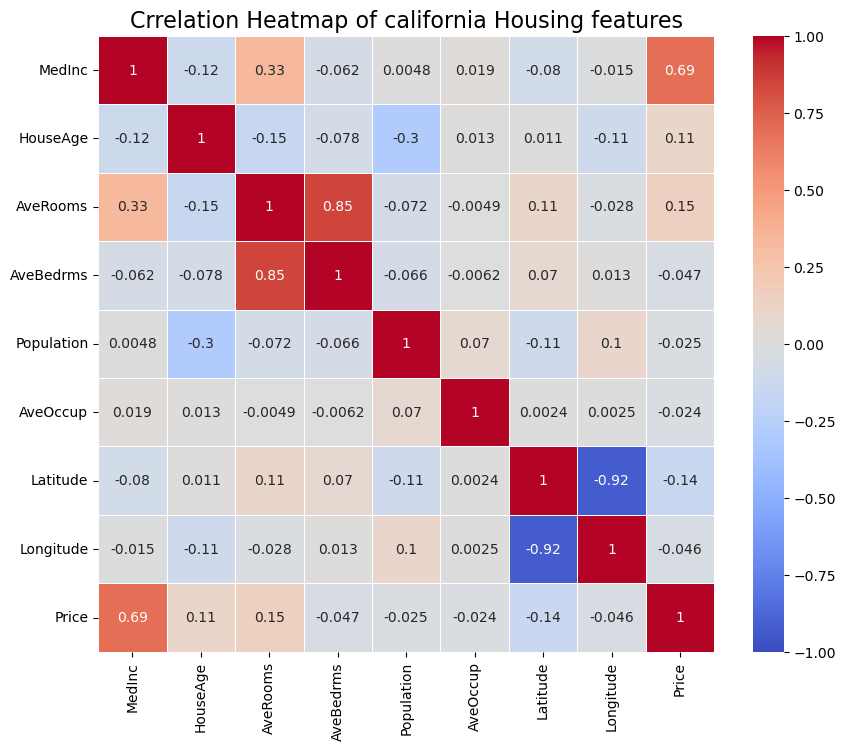

In [14]:
#Calculate correlation matrix
corr_matrix=df.corr()
plt.figure(figsize=(10,8))
#create heatmap
sns.heatmap(corr_matrix,
            annot=True,#show numbers in squares
            cmap='coolwarm',#color schemes(red-positive,blue-negative)
            vmin=-1,vmax=1,#Range of correlation values
            center=0,#center colormap at 0
            square=True,#Make squares uniform
            linewidths=0.5) #Lines between squares
#Add title
plt.title('Crrelation Heatmap of california Housing features',fontsize=16)
plt.show()


In [29]:
x=df[['MedInc']]
y=df['Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
#Linear regression
model=LinearRegression()
model.fit(x_train,y_train)
print(f"\nLinearEquation:Price={model.coef_[0]:.2f} * MedInc +{model.intercept_:.2f}")


LinearEquation:Price=0.42 * MedInc +0.44


In [32]:
y_pred=model.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)
print(f"\nName:{mae:.2f} $100k")
print(f"\nRMSE: {rmse:.2f} $100k")
print(f"R2: {r2:.2f}")


Name:0.63 $100k

RMSE: 0.84 $100k
R2: 0.46


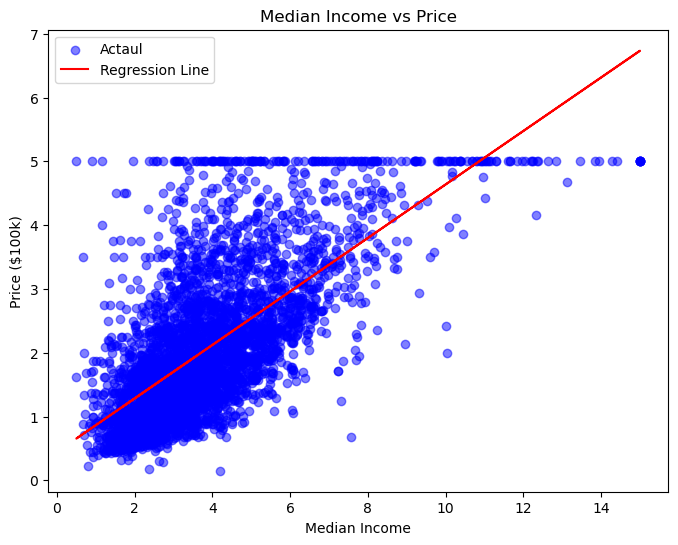

In [36]:
#visualize
plt.figure(figsize=(8,6))
plt.scatter(x_test,y_test,color='blue',label='Actaul',alpha=0.5)
plt.plot(x_test,y_pred,color='red',label='Regression Line')
plt.title('Median Income vs Price')
plt.xlabel('Median Income')
plt.ylabel('Price ($100k)')
plt.legend()
plt.show()